# General Notes
By Ryan Cox

I find version control useful for me so I'm keeping my work in a git repo. You can find it here: https://github.com/Infinite-Improbability/math322-inverse-theory

My experience, as discussed, is in Python. However, I decided that if I'm going to be doing a lot of matrix work I'd use something with native support and better performance. MatLab is, of course, great with matrices but I prefer something a bit more open. Enter Julia, which is both fast and designed with linear algebra and scientific computing in mind. I've been interested in learning it, so here we go.

# Problem 1.1

We are measuring subsets of objects. The data is the measured masses of the subsets (mostly triplets of objects). The parameters are the masses of the individual objects. There are 100 data values and 100 parameters.

In [2]:
# Lets find the matrix G such that d=Gm
#= NB: Julia's compiler apparently has better performance for functions than top level code
We don't need the performance gains here but I'll do it anyway to develop the habit.
Likewise, we'll use a sparse array. It won't matter for the relatively small matrices we're working with here,
but it may help if the function is used for something large.

Using a dense matrix causes an out of memory error with a large matrix (N=100000).
An alternate version of the below code involved insertions into a sparse matrix. That takes ~5.7s with N=100000. It can be viewed on commit 4c7e7ae
The following version is harder to read but handles N=100000 in ~0.0088s.

Yes, I know all this optimisation wasn't necessary. But it was fun!
=#

using SparseArrays

"""Make NxN square matrix and fill it with triplets of a coefficent a.
In a row with index r, the cells [r, r], [r, r-1], [r, r-2] are filled.
For example TripletsMatrix(5, 1) produces the sparse matrix
   [1 0 0 0 0;
    1 1 0 0 0;
    1 1 1 0 0;
    0 1 1 1 0;
    0 0 1 1 1]
"""
function TripletsMatrix(N::Int64, a::Float64)  # a is probably unneccessary (vs hardcoding a=1) except in some odd cases, but including it is trivial.
    #= We are creating a matrix with COO, a coordinate list.
    For some k, row[k] gives row index, col[k] gives col index and val[k] gives the value for that coordinate pair.
    We create the matrices in advance then increment over vector coordiantes with k because it is reportedly faster than appending to matrices. =#
    col = Vector{Int64}(undef, 3*(N-1)) # 3*(N-1) should be the amount of nonzero values <- 3 from the first two rows and 3*(N-2) from the rest.
    row = Vector{Int64}(undef, 3*(N-1))
    val = Vector{Float64}(undef, 3*(N-1))
    k = 1 # This tracks our location in the COO vectors
    for i = 1:N # Row index.
        for j in i-2:i # Column index, for non-zero values. We don't write to any columns higher than i so this doesn't do anything weird in the last row.
            if j > 0 # To handle first two rows.
                col[k] = j
                row[k] = i
                val[k] = a
                k += 1
            end
        end
    end
    sparse(row, col, val) # Takes our vectors and turns them into a sparse matrix
end;

In [3]:
N = 100
G = TripletsMatrix(N, 1)

display(G) # Julia prints larges sparse matrices in this dot format that merely highlights non-zero values. This is much more compact than the full matrix.
println()
println("""While this appears to show only two values in some places inspection of those rows, as below, shows this is not the case.
    I was confused as to why, until a friend realised it uses Braille characters to represent the structure, so it isn't a perfect representation.""")
println("Row 4, non-zero values:")
println(G[4,:])
println()

# What % of G is 0?
# nnz returns number of stored values. This can include zero if you have told it to store 0 somewhere! dropzeros can be handy to remove nonstructual zeros.
percent = (1 - nnz(G) / N^2) * 100
println(string(percent) * "% of G is zero")

LoadError: MethodError: no method matching TripletsMatrix(::Int64, ::Int64)
[0mClosest candidates are:
[0m  TripletsMatrix(::Int64, [91m::Float64[39m) at In[2]:25

# Problem 1.2
We are again measuring subsets of objects. The data is the height measurements of the subsets (stacks of objects). The parameters are the heights of the individual objects. This gives us 50 measurements and 50 parameters.

In [4]:
#= We'll just create NxN matrix filled with our coefficent and make a lower triangular matrix from it
I experimented with sparse matrices but they weren't a good fit here. You can only really start using them after LowerTriangular so it just hurts performance. =#

using LinearAlgebra

N = 50
G = LowerTriangular(fill(1, (N, N)))
display(G)

percent = (1 - count(!iszero, G) / N ^ 2) * 100
println(string(percent) * "% of G is zero")

50×50 LowerTriangular{Int64, Matrix{Int64}}:
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  1  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  1  1  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  1  1  1  1  1  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  1  1  1  1  1  1  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  1  1  1  1  1  1  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  1  1  1  1  1  1  1  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  1  1  1  1  1  1  1  1  1  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  1  1  1  

49.0% of G is zero


# Problem 1.3

In [5]:
z = Vector(LinRange(0, 10, 11)) # linear spacing, start=0, stop=10, # of values=11
G = [ones(11) z z.^2 z.^3]
display(G)

11×4 Matrix{Float64}:
 1.0   0.0    0.0     0.0
 1.0   1.0    1.0     1.0
 1.0   2.0    4.0     8.0
 1.0   3.0    9.0    27.0
 1.0   4.0   16.0    64.0
 1.0   5.0   25.0   125.0
 1.0   6.0   36.0   216.0
 1.0   7.0   49.0   343.0
 1.0   8.0   64.0   512.0
 1.0   9.0   81.0   729.0
 1.0  10.0  100.0  1000.0

# Problem 1.4

In [6]:
#= Unfortunately we aren't so lucky as to be able to directly reuse TripletsMatrix. Or rather, we could, but the tweaking we'd have to do after would be suboptimal.
This particular solution handles the endpoints by only overaging two values.
=#

function RunningAverageMatrix(N::Int64, a::Float64)
    # This is COO again
    T = 3 * N - 2 # 3*(N-2)+4 = 3*N-2 nonzero values <- 2 and 2 from the inital and final rows and 3*(N-2) from the rest.
    col = Vector{Int64}(undef, T) 
    row = Vector{Int64}(undef, T)
    val = Vector{Float64}(undef, T)
    k = 3 # This tracks our location in the COO vectors. We start at 3 because we're skipping the first two values for now.
    for i = 2:(N-1) # Row index. We start with the second row
        for j in i-1:(i+1) # Column index, for non-zero values.
            col[k] = j
            row[k] = i
            val[k] = a
            k += 1
        end
    end
    
    # Hardcoding is ugly but it works. I didn't need to keep the vector indices corresponding with the LTR order of elements in the matrix but I find it more clear.
    col[1] = 1
    row[1] = 1
    val[1] = (3/2)*a
    col[2] = 2
    row[2] = 1
    val[2] = (3/2)*a
    col[T-1] = N-1
    row[T-1] = N
    val[T-1] = (3/2)*a
    col[T] = N
    row[T] = N
    val[T] = (3/2)*a
    
    (1/3) * sparse(row, col, val) # Takes our vectors and turns them into a sparse matrix
end;

In [7]:
N = 10
G = RunningAverageMatrix(N, 1)
display(G)

percent = (1 - nnz(G) / N^2) * 100
println(string(percent) * "% of G is zero. This percentage increases with the size of the matrix.")

LoadError: MethodError: no method matching RunningAverageMatrix(::Int64, ::Int64)
[0mClosest candidates are:
[0m  RunningAverageMatrix(::Int64, [91m::Float64[39m) at In[6]:5

# Problem 1.5

We know that
$$ S = CH $$
and given the constraints in the problem $\textbf{S}$ and $\textbf{C}$ are row vectors and $\textbf{H}$ is some matrix. $\textbf{S}$ is the data, $\textbf{C}$ and $\textbf{H}$ are typically parameters. However, we know the compositions of the $p$ factors is known we can remove them from the parameters. Then it becomes clear that by taking the transpose of the entire equation we get
$$ \textbf{S}^T = (\textbf{CH})^T = \textbf{H}^T \textbf{C}^T$$
Where $\textbf{S}^T = \textbf{d}$, $\textbf{H}^T = \textbf{G}$ and $\textbf{C}^T = \textbf{m}$.

This assumes we know the composition of the end factors exactly.

# Problem 2.1

In [8]:
using Distributions

u = Uniform()
println("Mean: " * string(mean(u)))
println("Variance: " * string(var(u)))

Mean: 0.5
Variance: 0.08333333333333333


# Problem 2.2

$$ p(m) = \frac{1}{2\sqrt{2\pi m}}\exp\left[ \frac{(\sqrt{m} - \bar{d})^2}{2\sigma^2} \right] $$

# Problem 2.3

In [9]:
using Random

# Generate vector of realisations
n = Normal(4, 2)
r = rand(n, (1000))

# Filter down to values greater than <d>+2σ = 4+2*2 = 8
r8 = r[r .> 8] # This is an elementwise comparison

println("We expect 2.1% of values to be greater than <d>+2σ.")
println("With N=1000 this is 21 values.")
println("We found " * string(length(r8)) * " values meeting this critera.")

We expect 2.1% of values to be greater than <d>+2σ.
With N=1000 this is 21 values.
We found 22 values meeting this critera.


Because we generate a new vector on every execution I can't comment on a specific result. However, repeated executions show we are indeed getting around 21 values greater than 8.

# Problem 2.4

We know that $[\text{cov } \mathbf{m}] = \sigma_d^2 \mathbf{M} \mathbf{M}^T$. The diagonal elements are the variances so we will want them all to be $\sigma_m^2$. The offdiagonal elements of the product are the covariances, so we want them all to be zero. This means the product takes the form of an identity matrix multipled by scalar $\sigma_m^2$.

Thus, $\mathbf{M}$ must be an orthogonal matrix. This requires that the rows of $\mathbf{M}$ form an orthonormal basis in $\mathbb{R}^n$, where $n$ is the dimension of the matrix.

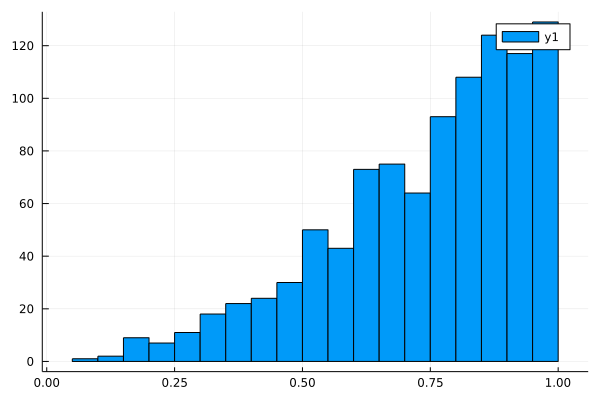

That seems an approximate match to a line y=3m^2


In [15]:
using Plots

u = Uniform()
ru = rand(u, (1000))
m = ru .^ (1/3)

display(histogram(m))
println("That seems an approximate match to a line y=3m^2")